<h6>Linear Regression with weight spike Analysis</h6>



<h4>Generate x and True y Values:</h4>

<h5>Create an array x with n_samples equally spaced values from 0 to 10.
Compute the true quadratic values y_true as
𝑦
=
𝑥
2
y=x
2</h5>
 .

 Determine Spikes:

Calculate the total number of spikes (n_spikes) based on the spike frequency (spike_freq).
Randomly select indices in the x array where these spikes will occur.

Generate Spike Values:

Create an array spikes initialized to zeros.
Assign random spike magnitudes (either positive or negative) at the previously selected indices.

Create Noisy Data:

Add the spikes array to the true y values (y_true) to get the noisy data y_noisy.

Plot the Data:

Plot the noisy data (x vs. y_noisy) as scattered points.
Plot the true function (x vs. y_true) as a red line.
Display the plot with a legend to differentiate between noisy data and the true function.






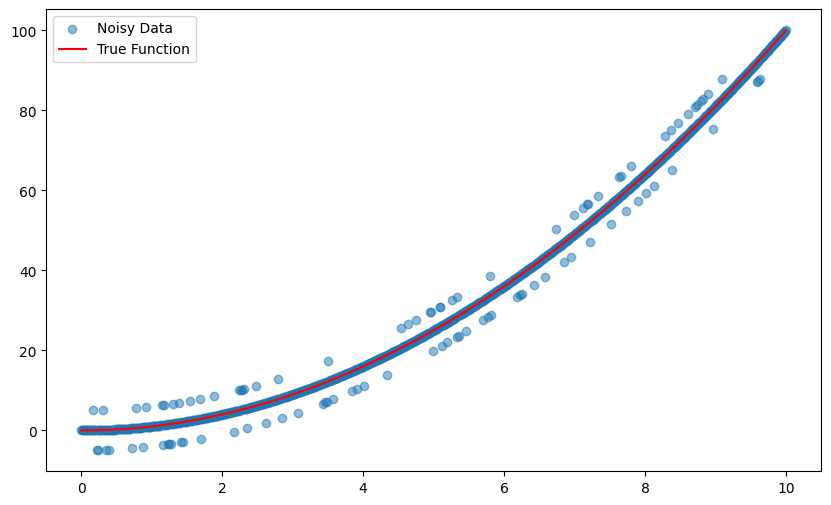

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n_samples, spike_freq, spike_magnitude):
    x = np.linspace(0, 10, n_samples)
    y_true = x**2

    # Determine number of spikes
    n_spikes = int(spike_freq * n_samples)

    # Generate random indices for spikes
    spike_indices = np.random.choice(n_samples, n_spikes, replace=False)

    # Generate spikes
    spikes = np.zeros(n_samples)
    spikes[spike_indices] = spike_magnitude * np.random.choice([-1, 1], n_spikes)

    y_noisy = y_true + spikes

    return x, y_true, y_noisy

# Example usage
x, y_true, y_noisy = generate_data(1000, 0.1, 5)

plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, alpha=0.5, label='Noisy Data')
plt.plot(x, y_true, 'r-', label='True Function')
plt.legend()
plt.show()


<h4>Based on the Plot we can conclude:

The data shows a clear, non-linear upward trend. As the x-value increases, the y-value grows at an accelerating rate. While individual data points (blue dots) vary somewhat, the overall pattern is well-captured by the smooth curve (red line).
This suggests there's a strong, predictable relationship between the variables, despite some noise in the measurements. The model (represented by the red line) appears to be a good fit for describing and potentially predicting this relationship.</h4>

Define Linear Regression Class:

A LinearRegression class is defined with an initializer that sets the polynomial degree (default is 2) and initializes the weights to None.

Fit Method:

The fit method adds a bias term (intercept) to the input features X and computes the weights using the normal equation: weights = (X_bias.T @ X_bias)^-1 @ X_bias.T @ y.

Predict Method:

The predict method also adds a bias term to the input features X and computes predictions by multiplying X_bias with the computed weights.

Generate Polynomial Features:

Polynomial features up to degree 2 are generated for the input x.

Train and Plot the Model:

Create an instance of the LinearRegression model and fit it using the noisy data.
Predict values using the model.
Plot the noisy data, the true quadratic function, and the predicted function for comparison.








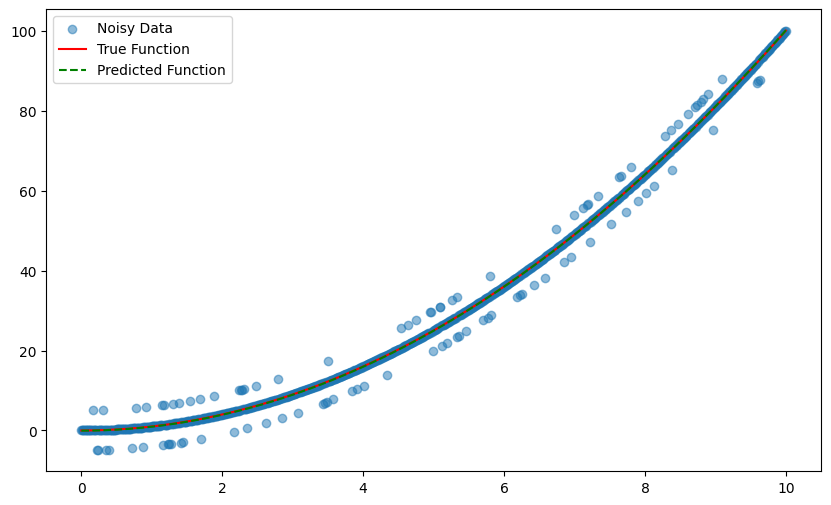

In [ ]:

class LinearRegression:
    def __init__(self, degree=2):
        self.degree = degree
        self.weights = None

    def fit(self, X, y):
        # Add bias term (intercept) to the features
        X_bias = np.c_[np.ones(X.shape[0]), X]

        # Compute weights using the normal equation
        self.weights = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

    def predict(self, X):
        # Add bias term (intercept) to the features
        X_bias = np.c_[np.ones(X.shape[0]), X]

        # Compute predictions
        return X_bias @ self.weights

# Example usage
# Generate polynomial features
X = np.column_stack([x**i for i in range(1, 3)])  # Polynomial features for degree=2

# Create the model and fit it
model = LinearRegression(degree=2)
model.fit(X, y_noisy)

# Predict the values
y_pred = model.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, alpha=0.5, label='Noisy Data')
plt.plot(x, y_true, 'r-', label='True Function')
plt.plot(x, y_pred, 'g--', label='Predicted Function')
plt.legend()
plt.show()


<h4>from the above plot we can conclude:

Model accuracy: The predicted function (green dashed line) closely aligns with the true function (solid red line), indicating that the prediction model is highly accurate.

Data fit: Both the true and predicted functions capture the overall trend of the noisy data points well.

Non-linear relationship: The data follows a non-linear pattern, increasing more rapidly as x increases.

Noise distribution: The blue data points show some scatter around the functions, representing noise or variability in the measurements.

Range: The x-axis spans from 0 to 10, while the y-axis goes up to about 100.

Outliers: There are a few data points that deviate noticeably from the general trend, which could be considered outliers.

Model robustness: Despite the presence of noise and potential outliers, the predicted function maintains a good fit, suggesting the model is robust.

Generalization: The close match between predicted and true functions suggests the model has good generalization capabilities, capturing the underlying relationship without overfitting to noise.</h4>



Linear Regression Class:

A LinearRegression class is created with fit and predict methods to compute weights using the normal equation and make predictions.

Generate Data Function:

The generate_data function creates noisy quadratic data with a specified number of spikes.

Evaluate Model Function:

The evaluate_model function calculates Mean Squared Error (MSE) and R-squared (R²) to assess model performance.

Loop Through Spike Frequencies:

Different spike frequencies are tested by generating noisy data, fitting the linear regression model, predicting values, and evaluating performance.
MSE and R² are stored for each spike frequency.

Plot Results:

The relationship between spike frequency and MSE is plotted to visualize how increasing noise affects model performance.






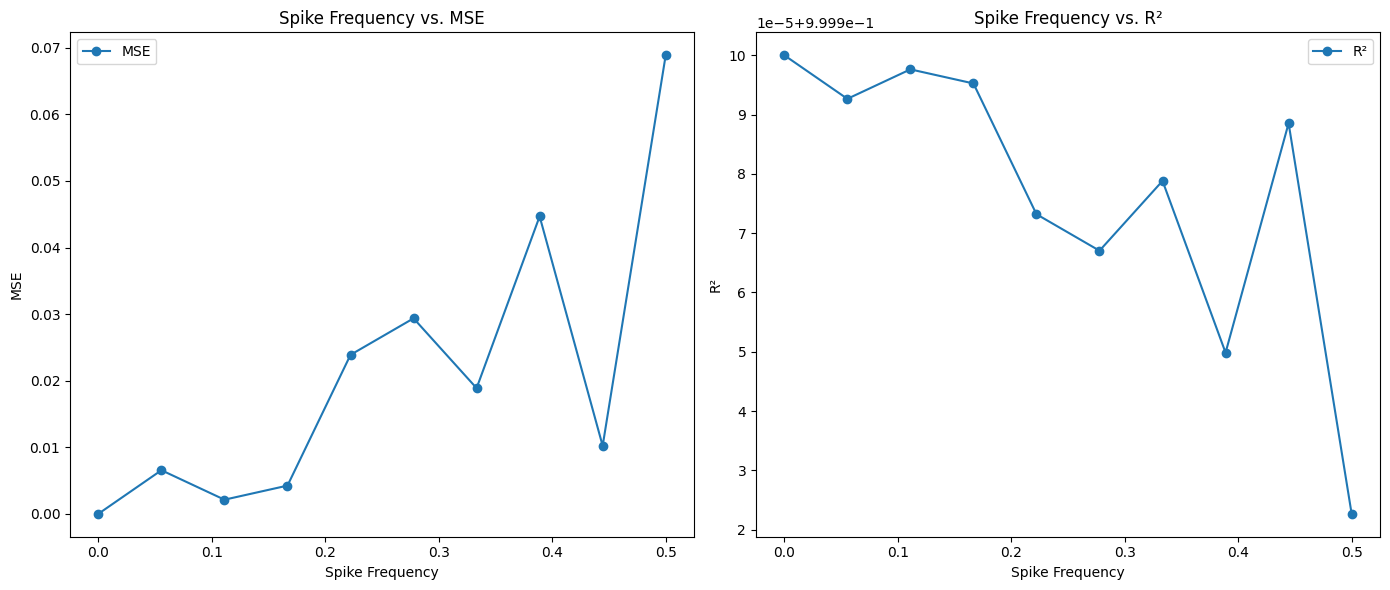

In [ ]:


class LinearRegression:
    def __init__(self, degree=2):
        self.degree = degree
        self.weights = None

    def fit(self, X, y):
        X_bias = np.c_[np.ones(X.shape[0]), X]
        self.weights = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

    def predict(self, X):
        X_bias = np.c_[np.ones(X.shape[0]), X]
        return X_bias @ self.weights

def generate_data(n_samples, spike_freq, spike_magnitude):
    x = np.linspace(0, 10, n_samples)
    y_true = x**2

    n_spikes = int(spike_freq * n_samples)
    spike_indices = np.random.choice(n_samples, n_spikes, replace=False)

    spikes = np.zeros(n_samples)
    spikes[spike_indices] = spike_magnitude * np.random.choice([-1, 1], n_spikes)

    y_noisy = y_true + spikes

    return x, y_true, y_noisy

def evaluate_model(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    r2 = 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)
    return mse, r2

# Loop through different spike frequencies
spike_frequencies = np.linspace(0, 0.5, 10)
mse_list = []
r2_list = []

for spike_freq in spike_frequencies:
    x, y_true, y_noisy = generate_data(1000, spike_freq, 5)

    # Generate polynomial features
    X = np.column_stack([x**i for i in range(1, 3)])  # Polynomial features for degree=2

    # Create the model and fit it
    model = LinearRegression(degree=2)
    model.fit(X, y_noisy)

    # Predict the values
    y_pred = model.predict(X)

    # Evaluate the model
    mse, r2 = evaluate_model(y_true, y_pred)

    # Store the results
    mse_list.append(mse)
    r2_list.append(r2)

# Plot the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(spike_frequencies, mse_list, 'o-', label='MSE')
plt.xlabel('Spike Frequency')
plt.ylabel('MSE')
plt.title('Spike Frequency vs. MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(spike_frequencies, r2_list, 'o-', label='R²')
plt.xlabel('Spike Frequency')
plt.ylabel('R²')
plt.title('Spike Frequency vs. R²')
plt.legend()

plt.tight_layout()
plt.show()


<h5>From these plots, we can conclude:

Relationship between spike frequency and model performance:

The left graph shows Mean Squared Error (MSE) and the right shows R² (coefficient of determination) as functions of spike frequency.


MSE trends:

MSE generally increases with spike frequency, indicating worse model performance.
There's a notable peak in MSE around 0.2-0.25 spike frequency.
MSE is lowest at 0 spike frequency, as expected.


R² trends:

R² generally decreases as spike frequency increases, also indicating declining model performance.
There's a sharp drop in R² around 0.2 spike frequency.
R² is highest (close to 1) at 0 spike frequency, indicating near-perfect fit.


Non-linear relationships:

Both MSE and R² show non-linear relationships with spike frequency.
There are fluctuations and unexpected peaks/troughs, suggesting complex interactions.


Optimal performance:

The model performs best with lower spike frequencies (closer to 0).


Sensitivity:

Model performance is highly sensitive to changes in spike frequency, especially in the 0.1-0.3 range.


Robustness:

The model's performance degrades with increasing spike frequency, but not uniformly.
There are regions where performance is more stable despite increasing spike frequency.



</h5>

<h5>These plots demonstrate how the frequency of spikes (likely representing outliers or noise) affects the model's predictive accuracy, with generally worse performance as spike frequency increases, but with some complex, non-linear patterns in the relationship.</h5>

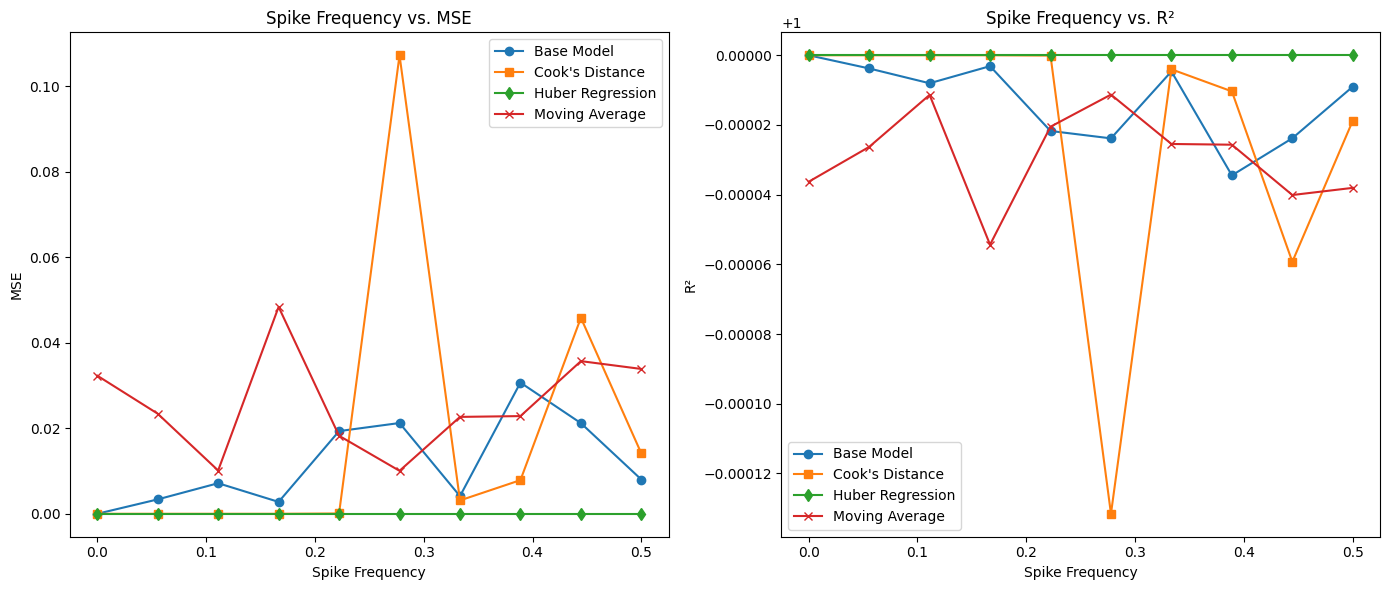

In [ ]:

from sklearn.linear_model import HuberRegressor

# Generate data function
def generate_data(n_samples, spike_freq, spike_magnitude):
    x = np.linspace(0, 10, n_samples)
    y_true = x**2

    n_spikes = int(spike_freq * n_samples)
    spike_indices = np.random.choice(n_samples, n_spikes, replace=False)

    spikes = np.zeros(n_samples)
    spikes[spike_indices] = spike_magnitude * np.random.choice([-1, 1], n_spikes)

    y_noisy = y_true + spikes

    return x, y_true, y_noisy

# Evaluate model function
def evaluate_model(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    r2 = 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)
    return mse, r2

# Fit and predict using Linear Regression
def linear_regression_fit_predict(X, y):
    X_bias = np.c_[np.ones(X.shape[0]), X]
    weights = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
    y_pred = X_bias @ weights
    return y_pred

# Cook's Distance for outlier detection and removal
def cooks_distance(X, y):
    X_bias = np.c_[np.ones(X.shape[0]), X]
    H = X_bias @ np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T
    residuals = y - X_bias @ np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
    mse = np.mean(residuals**2)
    cook_d = residuals**2 / (2 * mse) * (np.diag(H) / (1 - np.diag(H))**2)
    return cook_d

# Robust Regression using Huber Loss
def huber_regression_fit_predict(X, y):
    huber = HuberRegressor().fit(X, y)
    y_pred = huber.predict(X)
    return y_pred

# Generate polynomial features
def generate_polynomial_features(x, degree):
    return np.column_stack([x**i for i in range(1, degree + 1)])

# Apply moving average filter
def moving_average_filter(y, window_size=5):
    return np.convolve(y, np.ones(window_size)/window_size, mode='same')

# Loop through different spike frequencies
spike_frequencies = np.linspace(0, 0.5, 10)
mse_list_base = []
r2_list_base = []
mse_list_cooks = []
r2_list_cooks = []
mse_list_huber = []
r2_list_huber = []
mse_list_smoothing = []
r2_list_smoothing = []

for spike_freq in spike_frequencies:
    x, y_true, y_noisy = generate_data(1000, spike_freq, 5)
    X = generate_polynomial_features(x, degree=2)

    # Base Linear Regression
    y_pred_base = linear_regression_fit_predict(X, y_noisy)
    mse_base, r2_base = evaluate_model(y_true, y_pred_base)
    mse_list_base.append(mse_base)
    r2_list_base.append(r2_base)

    # Outlier Detection and Removal using Cook's Distance
    cook_d = cooks_distance(X, y_noisy)
    threshold = 4 / len(y_noisy)  # Cook's Distance threshold
    non_outliers = cook_d < threshold
    X_clean = X[non_outliers]
    y_noisy_clean = y_noisy[non_outliers]
    y_pred_cooks = linear_regression_fit_predict(X_clean, y_noisy_clean)
    mse_cooks, r2_cooks = evaluate_model(y_true[non_outliers], y_pred_cooks)
    mse_list_cooks.append(mse_cooks)
    r2_list_cooks.append(r2_cooks)

    # Robust Regression using Huber Loss
    y_pred_huber = huber_regression_fit_predict(X, y_noisy)
    mse_huber, r2_huber = evaluate_model(y_true, y_pred_huber)
    mse_list_huber.append(mse_huber)
    r2_list_huber.append(r2_huber)

    # Data Smoothing with Moving Average
    y_noisy_smoothed = moving_average_filter(y_noisy)
    y_pred_smoothing = linear_regression_fit_predict(X, y_noisy_smoothed)
    mse_smoothing, r2_smoothing = evaluate_model(y_true, y_pred_smoothing)
    mse_list_smoothing.append(mse_smoothing)
    r2_list_smoothing.append(r2_smoothing)

# Plot the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(spike_frequencies, mse_list_base, 'o-', label='Base Model')
plt.plot(spike_frequencies, mse_list_cooks, 's-', label="Cook's Distance")
plt.plot(spike_frequencies, mse_list_huber, 'd-', label='Huber Regression')
plt.plot(spike_frequencies, mse_list_smoothing, 'x-', label='Moving Average')
plt.xlabel('Spike Frequency')
plt.ylabel('MSE')
plt.title('Spike Frequency vs. MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(spike_frequencies, r2_list_base, 'o-', label='Base Model')
plt.plot(spike_frequencies, r2_list_cooks, 's-', label="Cook's Distance")
plt.plot(spike_frequencies, r2_list_huber, 'd-', label='Huber Regression')
plt.plot(spike_frequencies, r2_list_smoothing, 'x-', label='Moving Average')
plt.xlabel('Spike Frequency')
plt.ylabel('R²')
plt.title('Spike Frequency vs. R²')
plt.legend()

plt.tight_layout()
plt.show()
